## Ingenierie des connaissances

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# all imports
from ift6758 import *
import pandas as pd
import os.path

## Acquisition des Données

In [ ]:
csv_name = './data/dataframe_2016_to_2019.csv'
start_year, end_year = 2016, 2019

if not os.path.isfile(csv_name):
    data = data_extract(start_year, end_year)
    clean_regular, clean_playoff = data_clean(data)
    df_2016_to_2019 = dic_to_df(
        clean_regular, clean_playoff, list(range(start_year, end_year + 1))
    )
    print("Colonnes disponibles :", df_2016_to_2019.columns.tolist())
    df_2016_to_2019.to_csv(csv_name, index=False)
    

In [ ]:
donnees_entrainement = pd.read_csv(csv_name)

1.2. Binning des Distances et des Angles

In [7]:
# Binning des distances
donnees_entrainement['distance_tir_bin'] = pd.cut(
    donnees_entrainement['shotDistance'],
    bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
    labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
)

# Binning des angles
donnees_entrainement['angle_tir_bin'] = pd.cut(
    donnees_entrainement['shotAngle'],
    bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180],
    labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179']
)


1.3. Fonction pour Tracer des Histogrammes avec Binning

In [8]:
sns.set_style("whitegrid")
sns.set_context("talk")  

def tracer_histogramme(df, x_bin, hue, shrink, xlabel, ylabel, titre, legend_title, legend_labels):
    plt.figure(figsize=(12, 7))
    sns.histplot(
        data=df,
        x=x_bin,
        hue=hue,
        multiple='dodge',
        palette='viridis',  
        shrink=shrink,
        edgecolor='black',  
        linewidth=0.5
    )
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=16, fontweight='bold')
    plt.ylim(0, df[x_bin].value_counts().max() * 1.1)  
    plt.legend(title=legend_title, labels=legend_labels, fontsize=12, title_fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="y", linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

1.4. Histogramme du Nombre de Tirs par Distance (Buts et Non-Buts Séparés)

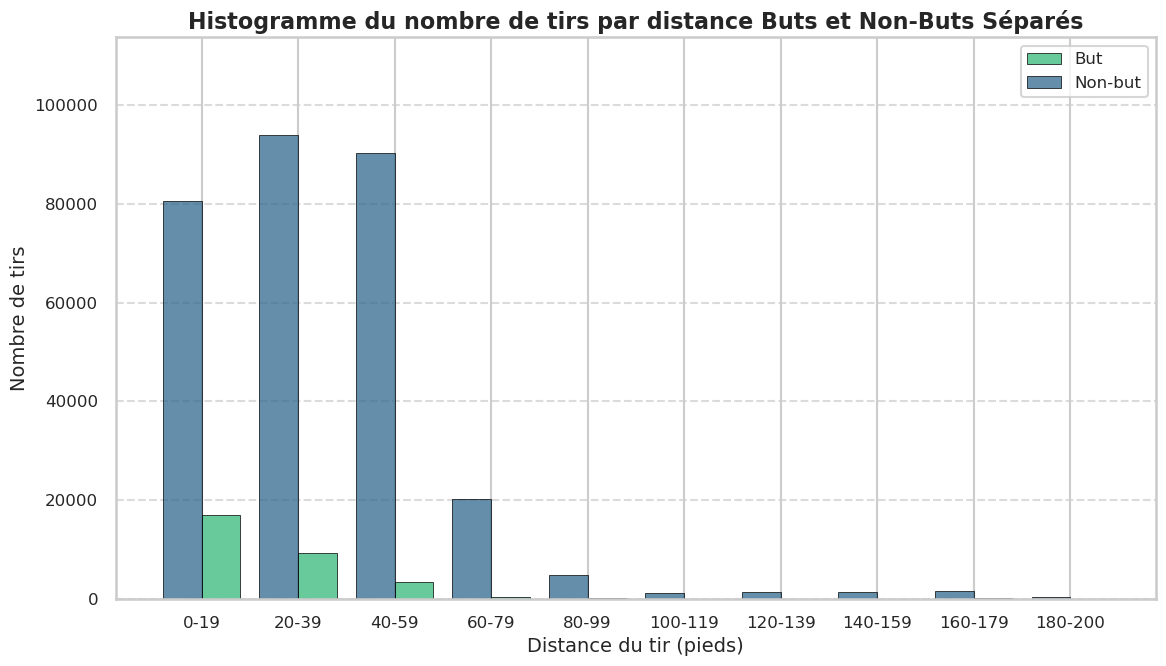

In [9]:
# Histogramme du nombre de tirs par distance avec le style moderne
tracer_histogramme(
    df=donnees_entrainement,
    x_bin='distance_tir_bin',
    hue='isGoal',
    shrink=0.8,
    xlabel='Distance du tir (pieds)',
    ylabel='Nombre de tirs',
    titre='Histogramme du nombre de tirs par distance Buts et Non-Buts Séparés',
    legend_title='',
    legend_labels=['But', 'Non-but']
)


1.5. Histogramme du Nombre de Tirs par Angle (Buts et Non-Buts Séparés)

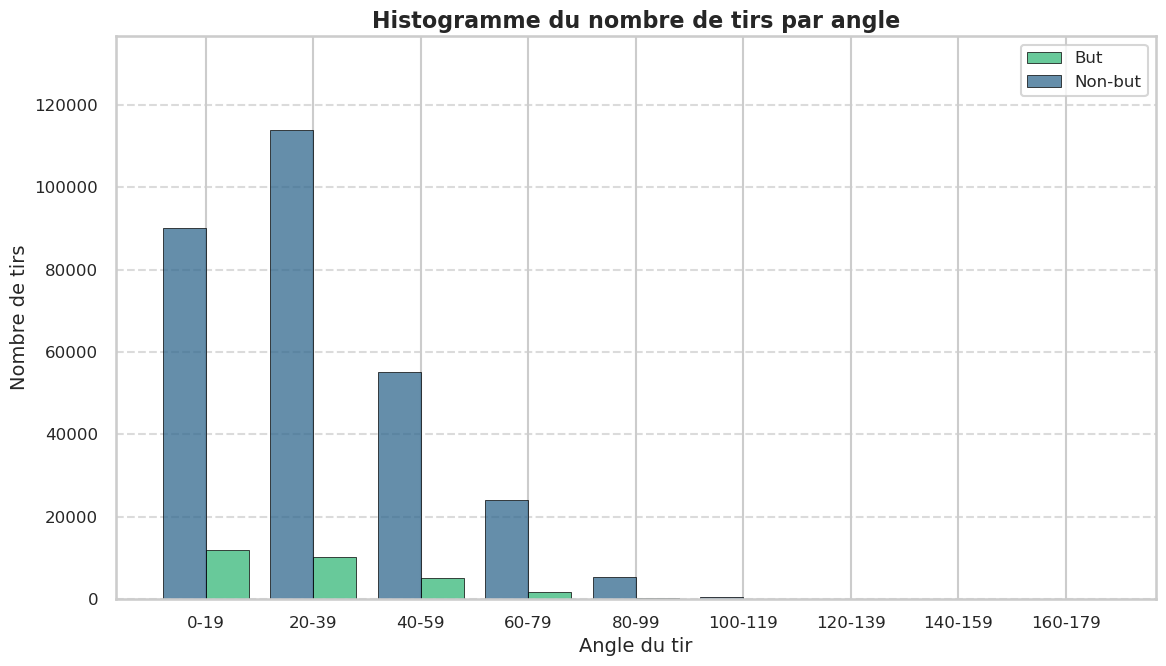

In [10]:
# Utilisation de la fonction modifiée pour l'histogramme du nombre de tirs par angle
tracer_histogramme(
    df=donnees_entrainement,
    x_bin='angle_tir_bin',
    hue='isGoal',
    shrink=0.8,
    xlabel='Angle du tir',
    ylabel='Nombre de tirs',
    titre='Histogramme du nombre de tirs par angle',
    legend_title='',
    legend_labels=['But', 'Non-but']
)


In [11]:
sns.set_style("whitegrid")
sns.set_context("talk")

def tracer_histogramme_2d_plt(df, x, y, bins, label_color, xlabel, ylabel, titre):
    df_clean = df.dropna(subset=[x, y])
    plt.figure(figsize=(12, 8))
    cmap = sns.color_palette("viridis", as_cmap=True)
    h = plt.hist2d(
        df_clean[x],
        df_clean[y],
        bins=bins,
        cmap=cmap,
        cmin=1
    )
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(label_color, rotation=270, labelpad=15, fontsize=12)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

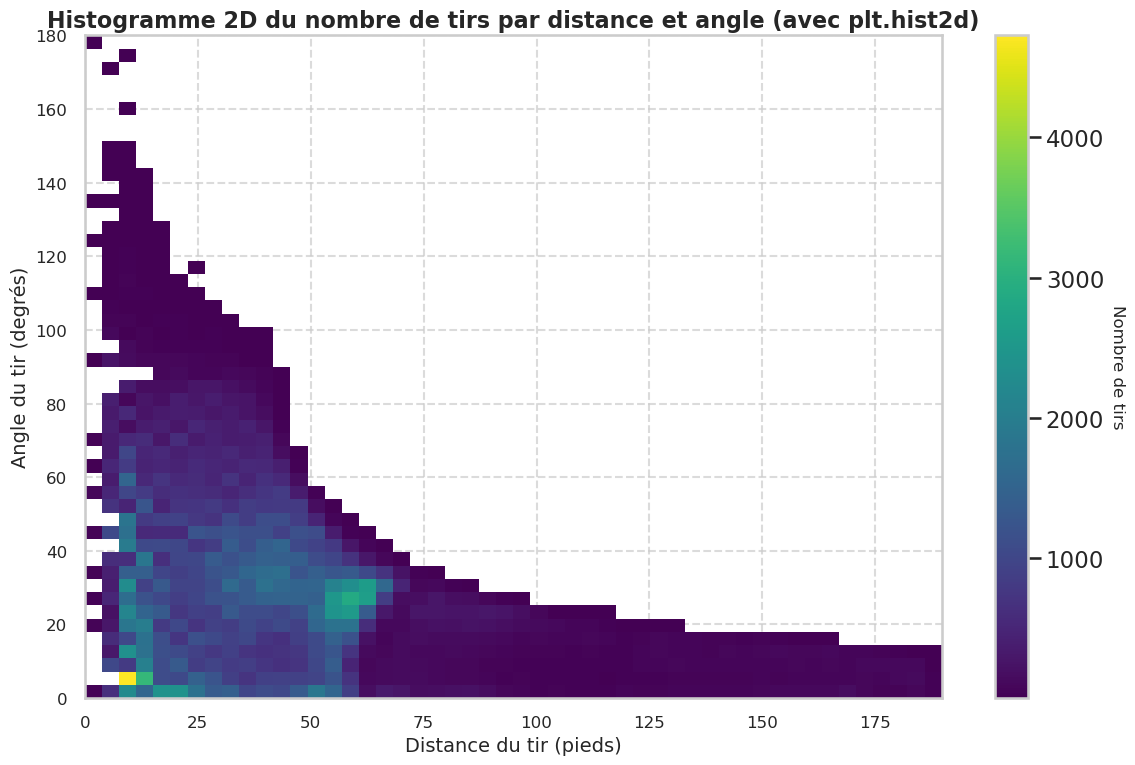

In [12]:
tracer_histogramme_2d_plt(
    df=donnees_entrainement,
    x='shotDistance',
    y='shotAngle',
    bins=50,
    label_color='Nombre de tirs',
    xlabel='Distance du tir (pieds)',
    ylabel='Angle du tir (degrés)',
    titre='Histogramme 2D du nombre de tirs par distance et angle (avec plt.hist2d)'
)

Question 2 : Taux de But en Fonction de la Distance et de l'Angle

2.1. Calcul du Taux de But par Distance

In [13]:

taux_but_distance = donnees_entrainement.groupby('shotDistance')['isGoal'].mean().reset_index()
taux_but_distance.columns = ['shotDistance', 'tauxBut']
taux_but_distance



,shotDistance,tauxBut
0,0.0,1.000000
1,1.0,1.000000
2,1.4,0.777778
3,2.0,0.500000
4,2.2,0.550000
...,...,...
1769,188.0,0.500000
1770,188.1,0.000000
1771,188.2,0.000000
1772,188.4,0.000000


2.3. Taux de But en Fonction de la Distance

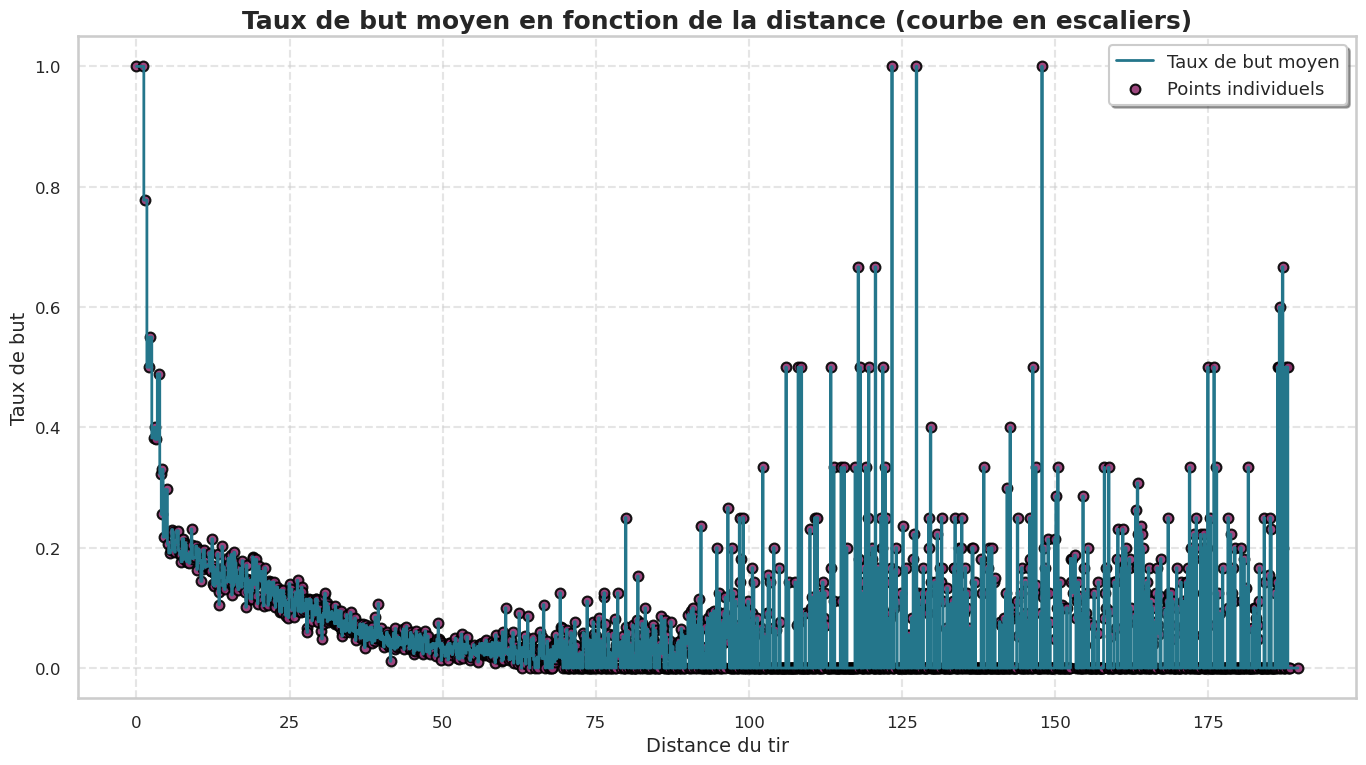

In [14]:
def tracer_courbe_escaliers(df, x, y, titre, xlabel, ylabel):
    sns.set_style("whitegrid")
    sns.set_context("talk")

    plt.figure(figsize=(14, 8))
    df_sorted = df.sort_values(by=x)

    line_color = sns.color_palette("crest", as_cmap=True)(0.6)
    point_color = sns.color_palette("flare", as_cmap=True)(0.7)

    plt.step(
        df_sorted[x],
        df_sorted[y],
        color=line_color,
        linewidth=2,
        where='mid',
        label='Taux de but moyen'
    )

    plt.scatter(
        df_sorted[x],
        df_sorted[y],
        color=point_color,
        edgecolor='black',  
        s=50,  
        alpha=0.9,
        label='Points individuels'
    )

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=13, loc='upper right', frameon=True, shadow=True)

    plt.grid(axis='both', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


tracer_courbe_escaliers(
    df=taux_but_distance,
    x='shotDistance',
    y='tauxBut',
    titre='Taux de but moyen en fonction de la distance (courbe en escaliers)',
    xlabel='Distance du tir',
    ylabel='Taux de but'
)

2.4. Calcul du Taux de But par Angle

In [15]:

taux_but_angle = donnees_entrainement.groupby('shotAngle')['isGoal'].mean().reset_index()
taux_but_angle.columns = ['shotAngle', 'tauxBut']


2.5. Taux de But en Fonction de l'Angle

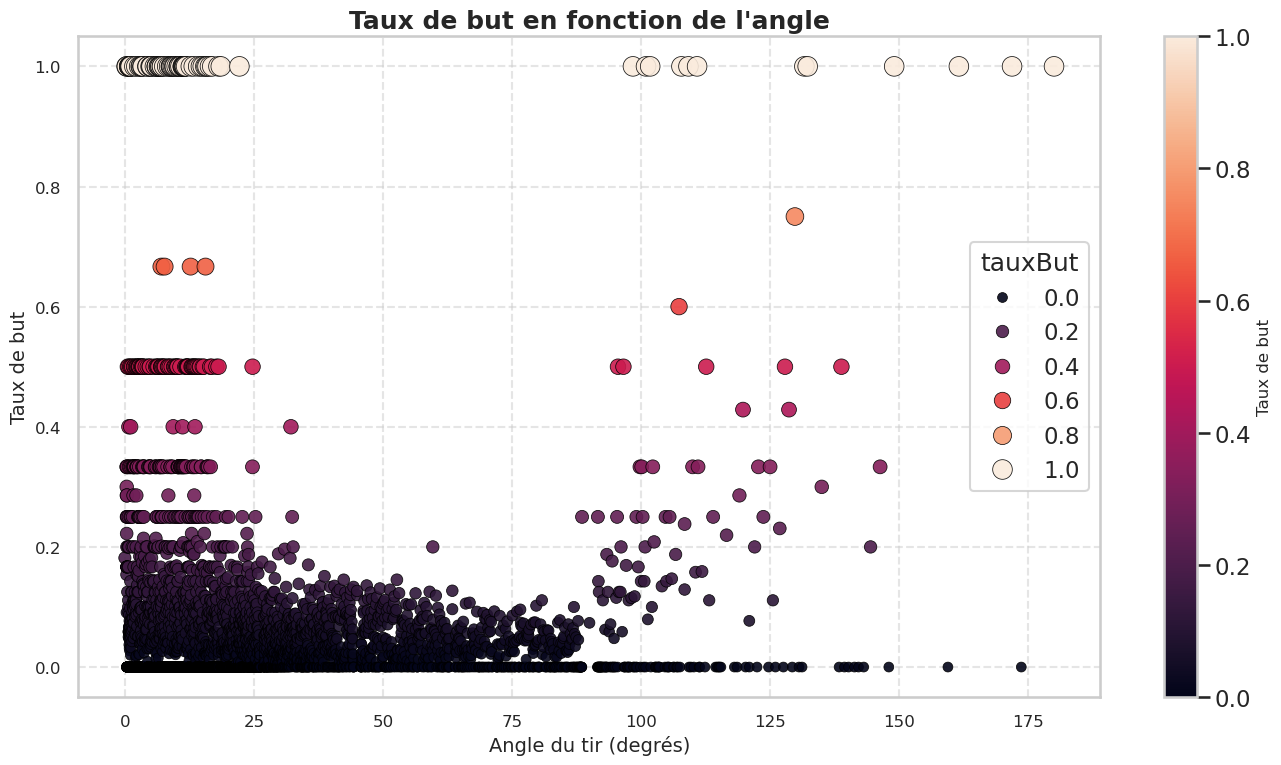

In [16]:
def tracer_scatterplot_angle_moderne(df, x, y, titre, xlabel, ylabel):
    
    sns.set_style("whitegrid")
    sns.set_context("talk")

    plt.figure(figsize=(14, 8))

    
    colors = sns.color_palette("rocket", as_cmap=True)

    
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue=y,  
        palette=colors,
        size=y, 
        sizes=(50, 200),  
        alpha=0.9,  
        edgecolor='black'  
    )

    
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="rocket"), ax=plt.gca())
    cbar.set_label("Taux de but", fontsize=12)

    
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titre, fontsize=18, fontweight='bold')

    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    
    plt.grid(axis='both', linestyle='--', alpha=0.5)

    
    plt.tight_layout()

    
    plt.show()


tracer_scatterplot_angle_moderne(
    df=taux_but_angle,
    x='shotAngle',
    y='tauxBut',
    titre='Taux de but en fonction de l\'angle',
    xlabel='Angle du tir (degrés)',
    ylabel='Taux de but'
)


2.6. Calcul du Taux de But par Bins de Distance

In [17]:
# Calcul du taux de but par bins de distance
stats_but_distance = donnees_entrainement.groupby('distance_tir_bin', observed=True).agg(
    nb_buts=('isGoal', 'sum'),
    nb_tirs=('isGoal', 'count')
)
stats_but_distance['taux_but'] = stats_but_distance['nb_buts'] / stats_but_distance['nb_tirs']


2.7. Fonction pour Tracer le Taux de But

In [18]:
def tracer_taux_but_combine(df, x, y, taux, taux_min, taux_max, titre, font_size, xlabel, xlabel_size, ylabel, ylabel_size):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Barres pour le taux de but
    bars = ax1.bar(df.index, df[taux]*100, color='lightblue', edgecolor='black', label='Taux de but (%)')

    # Ajouter les annotations sur les barres
    for bar, (_, row) in zip(bars, df.iterrows()):
        nb_buts = int(row[x])
        nb_tirs = int(row[y])
        taux_i = row[taux]
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{taux_i*100:.1f}%\n({nb_buts}/{nb_tirs})",
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

    # Titre et axes
    ax1.set_title(titre, fontsize=font_size)
    ax1.set_xlabel(xlabel, fontsize=xlabel_size)
    ax1.set_ylabel(ylabel, fontsize=ylabel_size)
    ax1.set_ylim(taux_min, taux_max)
    ax1.grid(alpha=0.5, linestyle='--', axis='y')

    # Ajuster la taille des ticks de l'axe des abscisses
    ax1.tick_params(axis='x', labelsize=10)

    # Courbe pour la tendance
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[taux]*100, color='red', marker='o', label='Tendance', linewidth=2)
    ax2.set_ylim(taux_min, taux_max)

    # Légendes
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes, fontsize=10)
    plt.tight_layout()
    plt.show()

2.8. Taux de But en Fonction de la Distance (Binned)

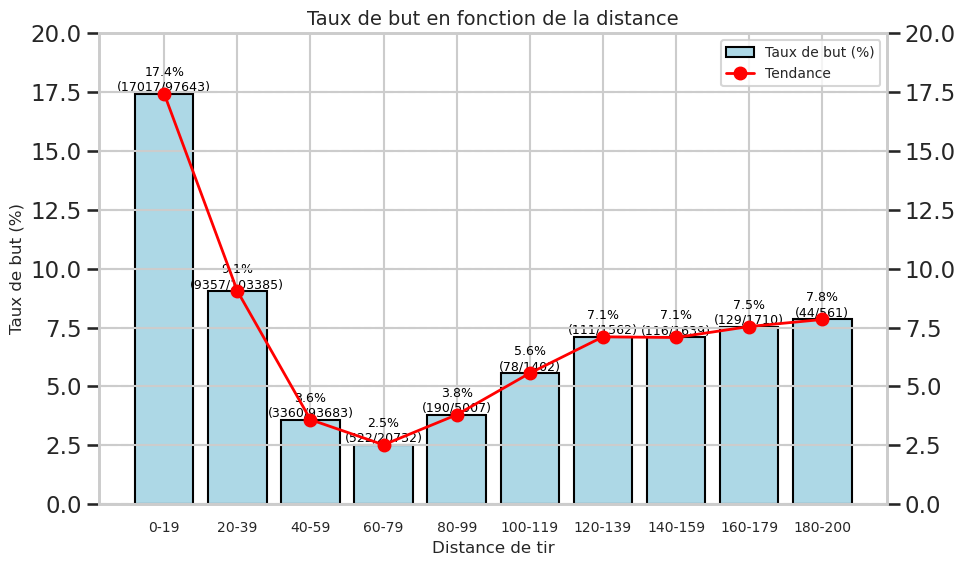

In [19]:
tracer_taux_but_combine(
    df=stats_but_distance,
    x='nb_buts',
    y='nb_tirs',
    taux='taux_but',
    taux_min=0,
    taux_max=20,
    titre='Taux de but en fonction de la distance',
    font_size=14,
    xlabel='Distance de tir',
    xlabel_size=12,
    ylabel='Taux de but (%)',
    ylabel_size=12
)

2.9. Calcul du Taux de But par Bins d'Angle

In [20]:
# Calcul du taux de but par bins d'angle
stats_but_angle = donnees_entrainement.groupby('angle_tir_bin', observed=True).agg(
    nb_buts=('isGoal', 'sum'),
    nb_tirs=('isGoal', 'count')
)
stats_but_angle['taux_but'] = stats_but_angle['nb_buts'] / stats_but_angle['nb_tirs']


2.10. Taux de But en Fonction de l'Angle (Binned)

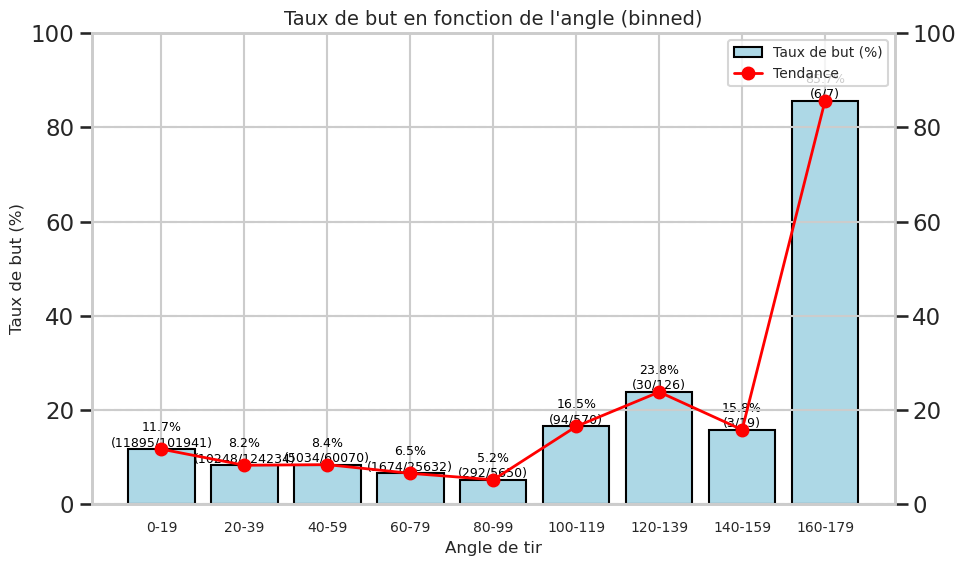

In [21]:
# Tracé du taux de but en fonction de l'angle (binned)
tracer_taux_but_combine(
    df=stats_but_angle,
    x='nb_buts',
    y='nb_tirs',
    taux='taux_but',
    taux_min=0,
    taux_max=100,
    titre='Taux de but en fonction de l\'angle (binned)',
    font_size=14,
    xlabel='Angle de tir',
    xlabel_size=12,
    ylabel='Taux de but (%)',
    ylabel_size=12
)


Question 3 : Vérifications des Anomalies Potentielles

3.1. Filtrage des Données pour les Buts depuis une Grande Distance sans Filet Vide

In [22]:
# Filtrage des données pour les buts depuis une distance supérieure à 90 sans filet vide
tirs_suspects = donnees_entrainement[
    (donnees_entrainement['shotDistance'] > 90) &
    (donnees_entrainement['typeDescKey'] == 'goal') &
    (donnees_entrainement['emptyGoalNet'] == 0)
]

# Nombre d'événements suspects
print(f"Nombre d'événements suspects : {len(tirs_suspects)}")


Nombre d'événements suspects : 118


3.2. Inspection d'un Événement Spécifique

In [34]:
# Inspection de l'événement avec l'index 1806
evenement_specifique = tirs_suspects.loc[1806, :]
evenement_specifique


Year                               2016
idGame                       2016020030
gameType                 regular-season
periodType                          REG
numberPeriod                          3
typeDescKey                        goal
eventOwnerTeam                Islanders
gameSeconds                        2879
previousEventType          shot-on-goal
timeSinceLastEvent                  0.0
previousXCoord                    -74.0
previousYCoord                      9.0
xCoord                             33.0
yCoord                             21.0
zoneShoot                             D
shootingPlayer             John Tavares
goaliePlayer                John Gibson
shotType                          wrist
teamSide                           home
emptyGoalNet                          0
isGoalAdvantage                 Neutral
isGoal                                1
shotDistance                      123.8
distanceFromLastEvent             107.7
rebound                            True


3.3. Observations sur les Anomalies

3.4. Filtrage des Données pour Tous les Buts depuis une Grande Distance

In [35]:
# Filtrage des données pour tous les buts depuis une distance supérieure à 90
tirs_longs = donnees_entrainement[
    (donnees_entrainement['shotDistance'] > 90) &
    (donnees_entrainement['typeDescKey'] == 'goal')
]

# Groupement par type de tir
groupes_tirs = tirs_longs.groupby(['shotType']).count()
print(groupes_tirs['idGame'])


shotType
backhand        36
deflected        2
slap            34
snap            41
tip-in          18
wrap-around      1
wrist          437
Name: idGame, dtype: int64


3.5. Inspection des Tirs de Type "Wrap-Around" depuis une Grande Distance

In [36]:
# Tirs de type "wrap-around" depuis une grande distance
tirs_wrap_around = tirs_longs[tirs_longs['shotType'] == 'wrap-around']
tirs_wrap_around


,Year,idGame,gameType,periodType,numberPeriod,typeDescKey,eventOwnerTeam,gameSeconds,previousEventType,timeSinceLastEvent,...,isGoal,shotDistance,distanceFromLastEvent,rebound,speedFromLastEvent,shotAngle,reboundAngleShot,offensivePressureTime,distance_tir_bin,angle_tir_bin
47255,2016,2016020779,regular-season,REG,3,goal,Penguins,3582,takeaway,2.0,...,1,92.0,22.1,False,11.05,0.622756,0.0,101.0,80-99,0-19


In [48]:
def plot_goals_by_distance(df):
    # Filtrer uniquement les buts
    buts_uniquement = df[df['typeDescKey'] == 'goal']

    # Remplacer les NaN dans 'emptyGoalNet' par 0
    buts_uniquement['emptyGoalNet'] = buts_uniquement['emptyGoalNet'].fillna(0)

    # Créer des bins pour la distance
    buts_uniquement['distance_bin'] = pd.cut(
        buts_uniquement['shotDistance'],
        bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
        labels=['0-19', '20-39', '40-59', '60-79', '80-99', '100-119', '120-139', '140-159', '160-179', '180-200']
    )

    # Tracer l'histogramme
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=buts_uniquement,
        x='distance_bin',
        hue='emptyGoalNet',
        multiple='dodge',
        shrink=0.8,
        palette='Set1'
    )
    plt.xlabel('Distance du tir (pieds)')
    plt.ylabel('Nombre de buts')
    plt.title('Histogramme des buts par distance (filet vide vs non-vide)')
    plt.legend(title='Filet vide', labels=['Non-vide', 'Vide'])
    plt.grid(axis="y")
    plt.show()


In [49]:
# Appeler la fonction pour tracer
plot_goals_by_distance(donnees_entrainement)


/tmp/ipykernel_225432/4463515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buts_uniquement['emptyGoalNet'] = buts_uniquement['emptyGoalNet'].fillna(0)


KeyError: 'shotDistance'

1. Histogramme du nombre de tirs par distance (buts et non-buts séparés)
L'analyse du nombre de tirs selon la distance au filet révèle une tendance claire : la majorité des tirs sont effectués à courte distance, en particulier dans la plage de 0 à 19 pieds. Cette tendance est cohérente pour les tirs ayant abouti à un but et ceux n'ayant pas marqué. Cependant, on observe que le nombre de buts diminue significativement à mesure que la distance augmente, tandis que les tirs non réussis dominent dans toutes les plages de distance. Cette observation peut être expliquée par le fait que, plus on s'éloigne du filet, plus la précision et la puissance nécessaires pour marquer augmentent, donnant un avantage au gardien pour effectuer un arrêt.

2. Histogramme du nombre de tirs par angle (buts et non-buts séparés)
Concernant l'angle de tir, les tirs se concentrent majoritairement dans les plages de 0 à 39 degrés. Cela s'explique par la géométrie du hockey sur glace : les joueurs cherchent à maximiser leurs chances de marquer en se positionnant face au filet ou à un angle optimal. On observe également que les tirs avec des angles plus grands (au-delà de 120 degrés) sont rares. Ces tirs sont souvent réalisés dans des situations défensives ou désespérées, ce qui réduit leur probabilité de succès.

3. Histogramme 2D : distance et angle
Le graphique 2D montre une forte densité de tirs dans la zone proche du filet (moins de 25 pieds) avec des angles inférieurs à 40 degrés. Cela indique que les joueurs optimisent généralement leurs positions pour obtenir des tirs avec une combinaison favorable de distance courte et d'angle réduit. La densité diminue progressivement à mesure que l'on s'éloigne du filet ou que l'angle augmente, soulignant que les tirs provenant de positions défavorables sont beaucoup moins fréquents.

4. Taux de but en fonction de la distance
Le taux de but diminue de manière significative avec l'augmentation de la distance. Dans les plages de 0 à 19 pieds, le taux de réussite est de 17,4 %, tandis qu'il chute à environ 2,5 % pour les distances entre 60 et 79 pieds. Cependant, une légère augmentation est visible pour les distances supérieures à 140 pieds, ce qui peut s'expliquer par des situations particulières telles que les filets vides. Cela montre l'importance de la proximité du filet pour maximiser les chances de marquer.

5. Taux de but en fonction de l'angle
Le taux de but est également influencé par l'angle de tir. Les angles proches de 0 à 19 degrés ont un taux de réussite de 11,7 %, ce qui correspond à des tirs réalisés face au filet. Ce taux diminue avec l'augmentation de l'angle, atteignant son minimum autour de 60 à 79 degrés (5,2 %). Cependant, une forte augmentation est observée pour les angles extrêmes (160-179 degrés), bien que cela soit probablement dû à un faible nombre d'observations dans cette plage, rendant les résultats moins représentatifs.

4. Ingénierie des caractéristiques II

In [41]:
# Identifier les pénalités
donnees_entrainement['powerPlayActive'] = False

active_power_play = 0
for index, row in donnees_entrainement.iterrows():
    if row['previousEventType'] == 'penalty':
        active_power_play = 120  # Exemple : 2 minutes (120 secondes)
    elif row['previousEventType'] == 'delayed-penalty':
        active_power_play = 300  # Exemple : 5 minutes (300 secondes)

    if active_power_play > 0:
        donnees_entrainement.at[index, 'powerPlayActive'] = True
        active_power_play -= row['timeSinceLastEvent']
    else:
        active_power_play = 0


In [43]:
print("Colonnes finales : ", donnees_entrainement.columns.tolist())


Colonnes finales :  ['Year', 'idGame', 'gameType', 'periodType', 'current_period', 'typeDescKey', 'eventOwnerTeam', 'total_game_seconds', 'last_event_type', 'time_since_last_event', 'last_event_x_position', 'last_event_y_position', 'action_x_position', 'action_y_position', 'zoneShoot', 'shootingPlayer', 'goaliePlayer', 'type_of_shot', 'teamSide', 'emptyGoalNet', 'isGoalAdvantage', 'isGoal', 'distance_to_goal', 'distance_from_last_event', 'is_rebound', 'event_speed', 'shot_goal_angle', 'rebound_angle_change', 'offensivePressureTime', 'distance_tir_bin', 'angle_tir_bin', 'powerPlayActive']


In [45]:
# Filtrer le match spécifique
filtered_df = donnees_entrainement[donnees_entrainement['idGame'] == 2017021065]

# Enregistrer les données filtrées
filtered_df.to_csv('wpg_v_wsh_2017021065.csv', index=False)


In [1]:
""" import wandb

run = wandb.init(project="Ingenierie caracteristiques")

# Créer un nouvel artéfact avec le fichier CSV
artifact = wandb.Artifact(
    "wpg_v_wsh_2017021065_csv",
    type="dataset"
)

# Ajouter le fichier CSV
artifact.add_file("wpg_v_wsh_2017021065.csv")

# Enregistrer l'artéfact
run.log_artifact(artifact)
run.finish()  """


' import wandb\n\nrun = wandb.init(project="Ingenierie caracteristiques")\n\n# Créer un nouvel artéfact avec le fichier CSV\nartifact = wandb.Artifact(\n    "wpg_v_wsh_2017021065_csv",\n    type="dataset"\n)\n\n# Ajouter le fichier CSV\nartifact.add_file("wpg_v_wsh_2017021065.csv")\n\n# Enregistrer l\'artéfact\nrun.log_artifact(artifact)\nrun.finish()  '